# from ZERO to HERO LightGBM Classifier

Hello beginners, I know you intend to go on a long journey. This journey you will embark on does not promise you a peaceful life in rose gardens, if you are told that it is and you think it will, you can return at the beginning of the road. The rest, you, too, prepare yourself for blood and tears and hug your loved ones for the last time. Be sure to put on all your weapons, get enough food and drink, and look into your lover's eyes for the last time on this journey. **SPARTANS! SHALL WE BEGIN?!**

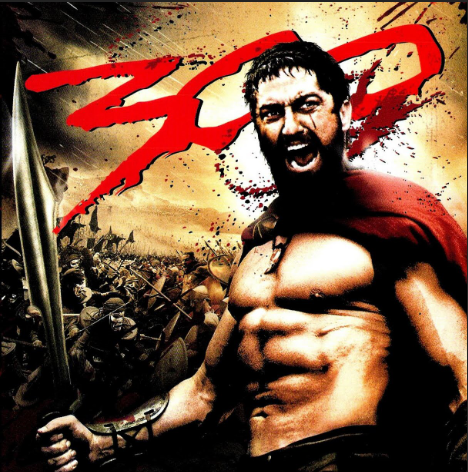

I will teach you what your weapons are to prepare for war, which weapon to use in this warbook. Later in a series I'll explain other weapons and food, drinks and of course what your lover is. Let's start with the first weapon called LightGBM which will be the main subject of this warbook.

# ***Motivation***

We all read dozens of notebooks here every day when we are at school or at work or in a war, of course, when we need something we run to Kaggle, Medium or TowardsDataScience. We write algorithms of unknown origin to our war books with copy-paste and change the variable names. So what about when there is a problem, when it fails?

What would you think if I promised you that I would end all these problems with the series I started with this war book and will write in the future? It would be very assertive but I can still soothe your pain but never your tears...

# ***LightGBM Classifier [main page](https://lightgbm.readthedocs.io/en/latest/index.html)***

LightGBM, a member of the Boosting family, is the most common model in Kaggle recently and we use it to quickly build base models. Should I say it's a weapon? So if the idea of boosting is "can we create a strong student out of weak students?" Did you know that it was first proposed by Michael Kearns in 1988  based on the question? Didn't you know? Now you know, and you can start this war stronger. [The Hypothesis](https://www.cis.upenn.edu/~mkearns/papers/boostnote.pdf)

LightGBM is a weapon that can be shaped according to the war you will enter. If your battle is regression, you should use the LightGBM Regressor model, if your battle is classification, you should use the LightGBM Classifier model. Nevertheless, real war is one's war with oneself, luck with you ... There are some features that really give a weapon its strength, such as being unbreakable, light, and if possible made of dragon bone. LightGBM also has some features that give it its power, and I will show on a data set what these features are, how they should be chosen and how they should be used in a war.

Let's call these features hyperparameters, and as your hyperparameters change, that is, as the characteristics of your weapon change, the result of the war changes. For this reason, it is necessary to choose hyperparameters carefully. There are many ways to choose the optimum features, but they will be the subject of another warbook. For now, let's see what these hyperparameters do ... Let's see that before we know the enemy, let's get to know the weapon we have!

# ***FEATURES of the WEAPON***

The parameters below are used for both classification and regression. Specific classification parameters will be discussed at the SOME SOURCES part.

**max_depth:** This parameter is an integer that controls the maximum distance between the root node of each tree and a leaf node. ***Decrease max_depth to reduce training time, but decreasing can reduce training accuracy also***

**num_leaves:** This is the main parameter to control the complexity of the tree model. We can set num_leaves = 2^(max_depth)-1 to obtain the same number of leaves as depth-wise tree. If max_depth = 7, then num_leaves = 127 but this equality may cause ovefitting. ***Decrease num_leave to prevent overfitting and reduce training time, but decreasing can reduce training accuracy also***

**min_data_in_leaf:** This is a very important parameter to prevent over-fitting in a leaf-wise tree. Its optimal value depends on the number of training samples and "num_leaves". Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. ***In practice, setting it to hundreds or thousands is enough for a large dataset.***

**num_threads:** By default, this will defer to the default behavior of OpenMP (one thread per real CPU core or the value in environment). ***For best performance, set this to the number of real CPU cores available.***

**min_gain_to_split:**  Gain is basically the reduction in training loss that results from adding a split point. By default, LightGBM sets min_gain_to_split to 0.0. ***Increase min_gain_to_split to reduce training time.***

**num_iterations:** Parameter controls the number of boosting rounds that will be performed. Since LightGBM uses decision trees as the learners, this can also be thought of as “number of trees”. ***Decrease num_iterations to reduce training time.***


**learning_rate:** Correlated parameter with "num_iterations". learning_rate will not have any impact on training time, but it will impact the training accuracy. ***As a general rule, if you reduce num_iterations, you should increase learning_rate.***

**early_stopping_rounds:** That “number of consecutive rounds” is controlled by the parameter early_stopping_rounds. For example, early_stopping_rounds=1 says “the first time accuracy on the validation set does not improve, stop training”. ***Set early_stopping_rounds and provide a validation set to possibly reduce training time.*** If you don't use early_stopping_rounds, model will stop after tried all parameters.

**Dataset:** When a LightGBM "Dataset" object is constructed, some features will be filtered out based on the value of "min_data_in_leaf". For a simple example, consider a 1000-observation dataset with a feature called **feature_1**. feature_1 takes on only two values: 25.0 (995 observations) and 50.0 (5 observations). If min_data_in_leaf = 10, there is no split for this feature which will result in a valid split at least one of the leaf nodes will only have 5 observations. Instead of reconsidering this feature and then ignoring it every iteration, LightGBM filters this feature out at before training, when the "Dataset" is constructed. **If this default behavior has been overridden by setting feature_pre_filter=False, set feature_pre_filter=True to reduce training time.**

***The hyperparameters below are used with "Dataset" parameter.***

**max_bin** or **max_bin_by_feature When Creating "Dataset":** Reducing the number of bins per feature can reduce the number of splits that need to be evaluated. max_bin is controls the maximum number of bins that features will bucketed into. It is also possible to set this maximum feature-by-feature, by passing max_bin_by_feature. **Reduce max_bin or max_bin_by_feature to reduce training time.**


**min_data_in_bin:** Some bins might contain a small number of observations, which might mean that the effort of evaluating that bin’s boundaries as possible split points isn’t likely to change the final model very much. You can control the granularity of the bins by setting min_data_in_bin. **Increase min_data_in_bin to reduce training time.**

**feature_fraction:** By default, LightGBM considers all features in a Dataset during the training process. This behavior can be changed by setting feature_fraction to a value > 0 and <= 1.0. Setting feature_fraction to 0.5, for example, tells LightGBM to randomly select 50% of features at the beginning of constructing each tree. This reduces the total number of splits that have to be evaluated to add each tree node. **Decrease feature_fraction to reduce training time.**

**max_cat_threshold:**  In this process, LightGBM explores splits that break a categorical feature into two groups. These are sometimes called “k-vs.-rest” splits. Higher max_cat_threshold values correspond to more split points and larger possible group sizes to search. **Decrease max_cat_threshold to reduce training time.**

***By default, LightGBM uses all observations in the training data for each iteration. It is possible to instead tell LightGBM to randomly sample the training data. This process of training over multiple random samples without replacement is called “bagging”.***

**bagging_freq:** Set bagging_freq to an integer greater than 0 to control how often a new sample is drawn. Set bagging_fraction to a value > 0.0 and < 1.0 to control the size of the sample. For example, {"bagging_freq": 5, "bagging_fraction": 0.75} tells LightGBM “re-sample without replacement every 5 iterations, and draw samples of 75% of the training data”. **Decrease bagging_fraction to reduce training time.**

**save_binary:** If you pass parameter save_binary, the training dataset and all validations sets will be saved in a binary format understood by LightGBM. **This can speed up training next time, because binning and other work done when constructing a Dataset does not have to be re-done.**

### **SUMMARY TO WIN A WAR!**

**For Better Accuracy**

1. Use large max_bin (may be slower)

2. Use small learning_rate with large num_iterations

3. Use large num_leaves (may cause over-fitting)

4. Use bigger training data

5. Try "dart"

**Deal with Over-fitting**

1. Use small "max_bin"

2. Use small "num_leaves"
 
3. Use "min_data_in_leaf" and "min_sum_hessian_in_leaf"
 
4. Use bagging by set "bagging_fraction" and "bagging_freq"
 
5. Use feature sub-sampling by set "feature_fraction"
 
6. Use bigger training data

7. Try "lambda_l1", "lambda_l2" and "min_gain_to_split" for regularization

8. Try "max_depth" to avoid growing deep tree

9. Try "extra_trees"

10. Try increasing "path_smooth"





# **FASTER... BETTER...**

If you want to win a war, then, you have to be fast, and furious. If you want to be fast, you must learn using your weapon faster. To use your weapon fasster you must use GPU. Every warrior doesn't have water cooling RTX 3090 unfortunately, so if you have a GPU and want to use your GPU, here is the documentation [for Windows;](https://lightgbm.readthedocs.io/en/latest/GPU-Windows.html).. For us, it will be subject of another warbook. We will continue with CPU, poor us...

# **APPLICATIONS and METRICS**

Your weapon works with the applications and metrics below. You can use whatever you need. For this warbook, we will learn to use it for classification problem.

LightGBM supports the following applications:

* regression, the objective function is L2 loss

* binary classification, the objective function is logloss

* multi classification

* cross-entropy, the objective function is logloss and supports training on non-binary labels

* lambdarank, the objective function is lambdarank with NDCG

LightGBM supports the following metrics:

* L1 loss

* L2 loss

* Log loss

* Classification error rate

* AUC

* NDCG

* MAP

* Multi-class log loss

* Multi-class error rate

* AUC-mu (new in v3.0.0)

* Average precision (new in v3.1.0)

* Fair

* Huber

* Poisson

* Quantile

* MAPE

* Kullback-Leibler

* Gamma

* Tweedie

# **IMPORTANCE is IMPORTANT**

Spartans! Our weapon show us our allies and our enemies. To win a war you must know your allies and you must take care your enemies. **plot_importance** parameter plots the importance of the features. The most important features are our allies and the least important features our enemies, the main point here is that, try not to delete your enemies! If you want to get a better score, first try to solve the mystery of the least important features, try to clean the noise to see the sunset! Many of you realized that when you delete the least important features your score get worse, so, try not to delete your enemies firstly, try to make peace!

# **SHALL WE BEGIN?**

**With all this theory, I see the fear I don't want to see in your eyes.** 

**I hear the roar of battle axes in your ears.** 

**Today is not that day. Today is not the day you will fear, today is the day you will fight...**

**For all you have, for your freedom, SPARTANS, draw your swords, we go!**

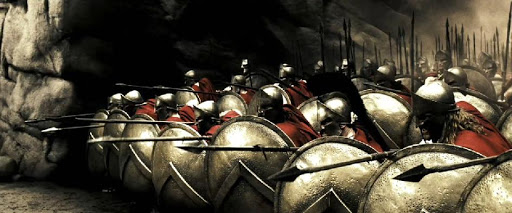

# **PRACTICE ON A DATASET**

We will use all we learnt up to now on a dataset. The dataset is a classification dataset about to classify a creature. There are 3 classes in the target feature, ghouls - goblins - ghosts. We will tyr to predict the class of the creature according to the independent features.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Importing necessary libraries;

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb
from lightgbm import LGBMClassifier

import random

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

**Uploading datasets.. There are 2 datasets, one of them is train set and the other is test set which doesn't contain the target feature. We will train our weapon on the train set, we will sharp our weapon on validation set which is a part of the train set, and finally we will use our sharpen weapon on the test set and see the results!**

In [ ]:
train_data = pd.read_csv("/kaggle/input/ghouls-goblins-and-ghosts-boo/train.csv.zip")
test_data = pd.read_csv("/kaggle/input/ghouls-goblins-and-ghosts-boo/test.csv.zip")

**First look into the train set and test set**

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
train_data.describe().T

In [ ]:
test_data.describe().T

### **Observations**

There is an "id" column that can be set as index in both sets and as we see the test set had been chosen from the train set. Look at the id columns.

"bone_length" column looks like normalized between 0 and 1. It measures the length of the bones of the creatures.

"rotting_flesh" also column looks like normalized between 0 and 1. It measures the percentages of the fresh meat of the creatures.

"hair_length" column looks like normalized between 0 and 1. It measures the length of the hair of the creatures.

"has_soul" column looks like normalized between 0 and 1. It measures the percentages of the soul of the creatures.

"color" column is a categorical column and tells us the color of the creatures.

Test data has more rows (529) than train data has (371)

Let's check the null rows

In [ ]:
train_data.isnull().sum()

In [ ]:
test_data.isnull().sum()

### **Observations**

There isn't any null row in both sets. So we don't have to use filling techiques on the datasets. But there will be a notebook about missing values about in the future, not only about filling with **mean, median, mode** but also **advanced techniques** .. **Keep calm and wait for the notebook!**

# **Some EDA**

Although EDA is not our topic, I will mention it briefly, because we need to take a look at the features to determine who is an ally and who is an enemy. **Keep calm, we will also work on a EDA and how to approach almost any kind of columns in the future, wait for the another notebook**

Countplot is used to count and group the categorical columns to observe the number of categories in the categorical columns

In [ ]:
graph = sns.countplot(x="color", data=train_data) #x is color column, data is the dataset
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
graph = sns.countplot(x="color", data=test_data)
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### **Observations**

Number of the white colored creatures are the highest in the both sets

Clear colored cretures are following the white colored creatures.

The other colors nearly have same frequncies. 

So, the model will probably learn white and clear colors better.

Jointplot is used to show the distribution between 2 integer or float columns and and also is used to show the distribution of a column within itself.

In [ ]:
#bone_length and has_soul are float columns from tarin_data
sns.jointplot(train_data.loc[:,'bone_length'], train_data.loc[:,'has_soul'], kind="regg", color="#ce1414")

In [ ]:
#bone_length and has_soul are float columns from tarin_data
sns.jointplot(train_data.loc[:,'hair_length'], train_data.loc[:,'rotting_flesh'], kind="regg", color="#ce1414")

### **Observations**

has_soul and bone_length columns are positive correlated columns. While bone_length increases has_soul also increases. Both columns look they have normal distribution.

hair_length and rotting_flesh columns are negative correlated columns. While hair_length decreases rotting_flesh also decreases. Both columns look they have normal distribution.

You can try all float and integer columns one by one and discover the relations between the columns. **Don't forget to use same codes on the test data! If you discover a hidden pattern you can win a competition!**

**In order not to break with the main subject, we can now return to our main topic, LightGBM. As I mentioned above, I will create and share all kinds of notebooks with you in the future with all the details and how to approach a problem! Please don't forget to upvote and follow, I'm open to all comments.**

# ***LIGHTGBM***

The topic of this notebook is LightGBM CLassifier, **I'll also prepare LightGBM Regressor and simple LightGBM with Hyperopt or Optuna and Bayesian Optimization!**

Let's prepare the tarin_data for the LightGBM Classifier.

We will change the type of the "color" categorical column to the integer, and also change the target column, "type", to the integer.

Color column is a nominal column, so we will use one-hot-encoding, but in pandas there is "get_dummies" function which is very useful, easy to use and do the same thing with one-hot-encoding.

Type column is also a nominal column but due to be the target column we should use Label Encoder. I will show you 2 approach to convert categorical columns. One of them is LabelEncoder and the other is map function. You can use whichever you want.

**I will also share a notebook about Encoding Types which are game changer in the competitions. I will share the differences, the usages and the results about encoders. Keep calm and wait for the notebook!**

In [ ]:
# drop the original color column and create color_category (color_white, color_clear, etc.) columns with "prefix"
train_data = pd.get_dummies(train_data, columns=["color"], prefix=["color"])

2 approaches are below, I usually prefer mapping, so, I will use mapping function here again

In [ ]:
# Approach 1
#le = LabelENcoder ()
#train_data["type"] = label_encoder.fit_transform(train_data["type"].astype(str)) #you need to code .astype(str) in Label Encoding

#Approach 2

map_type = {"Ghoul":1, "Goblin":2, "Ghost":0} # change ghoul, goblin, ghost to 1, 2 and 0
train_data.loc[:, "type"] = train_data.type.map(map_type)

Don't forget to change id column to the index! And final look to our dataset!

In [ ]:
train_data = train_data.set_index('id')
train_data.head()

Independent features are appointed to "X", and dependent feature is appointed to "y". 40% of the train_data is allocated for testing.

In [ ]:
X = train_data.drop(["type"],axis=1)
y = train_data.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## ***LightGBM Classifier***

First we need to define the parameters and intervals. Parameters should be defined in a dictionary. The model will try all the intervals we defined and try to find the optimum parameters to get the best score. **You can add more parameters if you want, but don't forget, more parameters mean more time!**

In [ ]:
# These parameters will be used in gridsearch and will be found optimum parameters
param_grid = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': [0.01,0.1,0.5],
    'subsample_for_bin': [20000,50000,100000,120000,150000],
    'min_child_samples': [20,50,100,200,500],
    'colsample_bytree': [0.6,0.8,1],
    "max_depth": [5,10,50,100]
}

In [ ]:
lgbm = LGBMClassifier() # Shortname the LGBMClassifier()

lgbm.fit(X_train, y_train) # Train the lgbm on train sets

In [ ]:
#%%time
#lgbm_cv = GridSearchCV(lgbm, param_grid, cv=5, n_jobs=-1, verbose=2) #5 fold cross validation
#lgbm_cv.fit(X_train, y_train) #try all parameters
#lgbm_cv.best_params_ #print optimum parameters

The code above lasts too long so I changed it to comment rows, if you want to run just delete the # symbols. You can also reduce the number of parameters and then run the code above. But be careful, it really lasts :)

Total 3240000 fits were applied to the train set, processing lasted 8 hours 46 minutes. A very long time, and if you add more parameter the time will be longer. There are any other methods to find optimum parameters but they will be a story of another notebook.

In [ ]:
# Here are the optimum values of the parameters
{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_samples': 20,
 'num_leaves': 30,
 'subsample_for_bin': 20000}

In [ ]:
lgbm_tuned = LGBMClassifier(boosting_type = 'gbdt',
                            class_weight = None,
                            min_child_samples = 20,
                            num_leaves = 30,
                            subsample_for_bin = 20000,
                            learning_rate=0.01, 
                            max_depth=10, 
                            n_estimators=40, 
                            colsample_bytree=0.6) # LightGBM Classifier with optimum paramteres
lgbm_tuned.fit(X_train, y_train) #Fit the model with the optimum parameters

In [ ]:
y_test_pred = lgbm_tuned.predict(X_test) #Predicting X_test to find the solutiın

score = round(accuracy_score(y_test, y_test_pred), 3) # Find the accuracy of y_test and predicitons, and round the result
print(score)

The accuracy score is 0.718. Now you can apply the last mdoel to the test set and upload it to see your place in the LeaderBoard

# ***Last but not Least***

If you wonder the importance of the futures, take a look at the importance plot

In [ ]:
sns.set_context("talk")
style.use('fivethirtyeight')

fi = pd.DataFrame()
fi['features'] = X.columns.values.tolist()
fi['importance'] = lgbm_tuned.booster_.feature_importance(importance_type='gain')

sns.barplot(x='importance', y='features', data=fi.sort_values(by='importance', ascending=True))

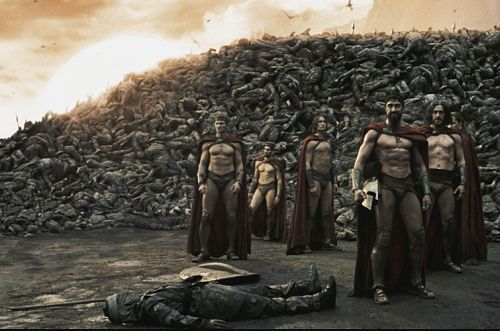

# ***SOME SOURCES***

[Here is the winning solutions of kaggle competitions with LightGBM](https://github.com/microsoft/LightGBM/tree/master/examples#machine-learning-challenge-winning-solutions)

[For further information in LightGBM CLassifier and parameters](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier)

### ***Thanks in advance for your comments and advice.***

## ***It took about 1 week to prepare the notebook, I would appreciate it if you upvote.*** 

## ***I will publish other notebooks as soon as possible.***

## ***I will develop this notebook further with your advices.***